<a href="https://colab.research.google.com/github/Dmytro-Ostrenko/Data09/blob/dev/team_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Завдання:
Студентам пропонується реалізувати веб-сервіс, що класифікує зображення з використанням згорткових нейронних мереж.

Завантажте та ознайомтесь з датасетом https://www.kaggle.com/c/cifar-10. У ньому ви знайдете 60000 кольорових зображень розміром 32x32, розбитих на 10 класів по 6000 прикладів на клас. Створіть та навчіть згорткову нейронну мережу, здатну віднести передане їй зображення до одного з 10 класів, запропонованих у датасеті. Вам належить самостійно підібрати архітектуру нейронної мережі, а саме: кількість згорткових шарів, кількість нейронів у повнозв'язному шарі, активаційні функції, гіперпараметри тощо. Намагайтеся отримати якомога більшу точність класифікації. Для цього використовуйте розглянуте на заняттях розширення навчальної множини, перевикористання та донавчання нейронних мереж (наприклад VGG16 або будь-якої іншої).

Напишіть веб-інтерфейс у зручному Python-фреймворку, за допомогою якого користувач зможе завантажити зображення, а у відповіді отримати назву одного з 10 запропонованих в датасеті класів.
За бажанням працюючий проект можна завантажити на heroku, aws, gcp, azure або будь-яку іншу хмарну платформу.

Критерії прийому
Проєкт має бути збережений в окремому репозиторії та бути загальнодоступним (GitHub, GitLab або BitBucket).
Навчена нейронна мережа має бути збережена у репозиторії проєкту.
Проєкт повинен містити короткий опис архітектури нейромережі, які способи тюнінгу були використані при навчанні, а також графіки втрат та точності, побудовані на тренувальних, тестових та валідаційних даних.
Проєкт повинен містити докладну інструкцію щодо встановлення та використання.
Необхідно реалізувати веб-інтерфейс.
Програма має бути контейнеризована в Docker, а образ завантажений на dockerhub.
Створення Dockerfile:  Розробіть Dockerfile для створення образу Docker, який дозволить розміщувати та запускати нашу програму в контейнеризованому середовищі. Dockerfile має включати всі необхідні інструкції для створення образу, включаючи вибір базового образу, копіювання вихідного коду програми до контейнера, встановлення необхідних залежностей та визначення команди для запуску програми.
Використання Docker Compose:  Інтегруйте інструмент Docker Compose для спрощення процесу розгортання та управління нашим проектом у середовищі Docker. Створіть файл docker-compose.yml, який описує послуги, мережі та томи, необхідні для проекту. Файл повинен дозволяти запускати весь проект за допомогою однієї команди docker-compose up, автоматизуючи створення та запуск необхідних Docker контейнерів.

P.S.: Ви можете розширити функціонал проєкту на свій розсуд обов'язково проконсультувавшись з ментором перед цим. Розглядайте цей проєкт, як частину вашого портфоліо і корисний вам інструмент. З цієї причини ініціатива у розширенні та доповненні вимог до проєкту вітається.


МОДЕЛЬ 87

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 51s 53ms/step - accuracy: 0.1816 - loss: 2.0728 - val_accuracy: 0.2370 - val_loss: 1.8341
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.3012 - loss: 1.7432 - val_accuracy: 0.3529 - val_loss: 1.6211
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.3746 - loss: 1.5853 - val_accuracy: 0.5165 - val_loss: 1.2460
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.5139 - loss: 1.3159 - val_accuracy: 0.5927 - val_loss: 1.1872
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.5971 - loss: 1.1482 - val_accuracy: 0.6545 - val_loss: 1.0585
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.6493 - loss: 1.0270 - val_accuracy: 0.6789 - val_loss: 0.9490
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.6818 - loss: 0.9331 - val_accuracy: 0.7070 - val_loss: 0.8460
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.7050 - loss: 0.8780 - val_accurac

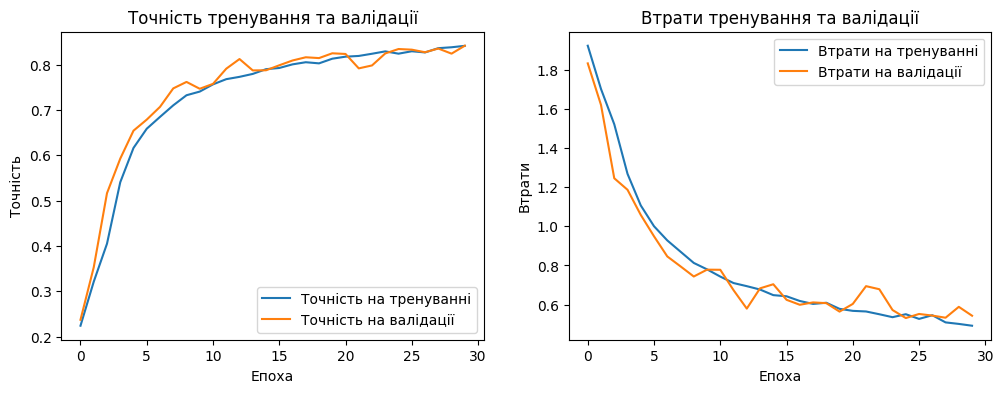

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import os
import matplotlib.pyplot as plt

# Визначення функції побудови моделі з фіксованими гіперпараметрами
def build_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

    x = base_model.output
    x = GlobalAveragePooling2D()(x)

    # Фіксовані гіперпараметри
    units = 1024
    dropout_rate = 0.3
    learning_rate = 1e-3

    x = Dense(units=units, activation='relu')(x)
    x = layers.Dropout(dropout_rate)(x)

    predictions = Dense(10, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Завантаження датасету CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Нормалізація зображень
train_images, test_images = train_images / 255.0, test_images / 255.0

# Розширення навчальної множини
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    zoom_range=0.2,
    shear_range=0.2
)
datagen.fit(train_images)

# Перевірка наявності збереженої моделі
if os.path.exists('best_model.keras'):
    print("Завантаження збереженої моделі...")
    model = tf.keras.models.load_model('best_model.keras')
else:
    # Побудова моделі
    model = build_model()

    # Колбеки для збереження найкращої моделі та ранньої зупинки
    checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, mode='max', restore_best_weights=True)

    # Навчання моделі
    history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                        epochs=30,
                        validation_data=(test_images, test_labels),
                        callbacks=[checkpoint, early_stopping])

    # Збереження історії тренування
    with open('training_history.json', 'w') as f:
        import json
        json.dump(history.history, f)

# Візуалізація точності та втрат, якщо історія тренування доступна
if os.path.exists('training_history.json'):
    with open('training_history.json', 'r') as f:
        history = json.load(f)

    plt.figure(figsize=(12, 4))

    # Графік точності
    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'], label='Точність на тренуванні')
    plt.plot(history['val_accuracy'], label='Точність на валідації')
    plt.xlabel('Епоха')
    plt.ylabel('Точність')
    plt.legend()
    plt.title('Точність тренування та валідації')

    # Графік втрат
    plt.subplot(1, 2, 2)
    plt.plot(history['loss'], label='Втрати на тренуванні')
    plt.plot(history['val_loss'], label='Втрати на валідації')
    plt.xlabel('Епоха')
    plt.ylabel('Втрати')
    plt.legend()
    plt.title('Втрати тренування та валідації')

    plt.show()

# Класифікація нових зображень
# Приклад: new_images, new_labels = load_new_images()
# new_images = new_images / 255.0
# predictions = model.predict(new_images)
# print(predictions)

Завантаження збереженої моделі...


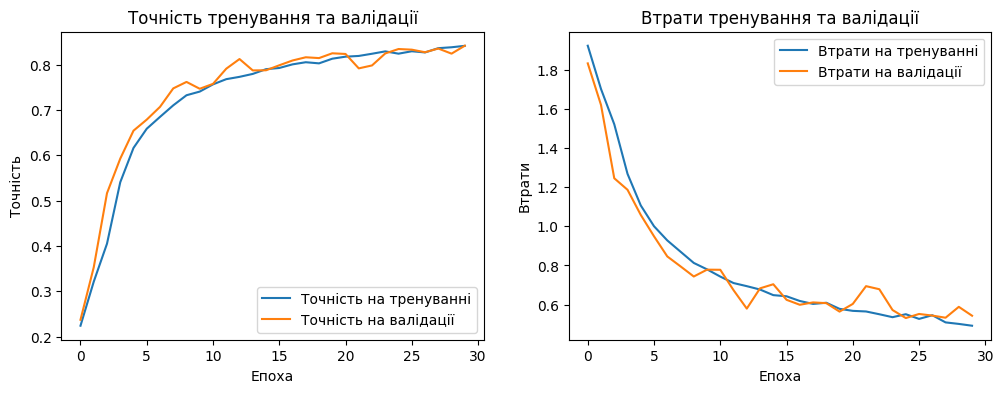

In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import os
import matplotlib.pyplot as plt

# Визначення функції побудови моделі з фіксованими гіперпараметрами
def build_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

    x = base_model.output
    x = GlobalAveragePooling2D()(x)

    # Фіксовані гіперпараметри
    units = 1024
    dropout_rate = 0.3
    learning_rate = 1e-3

    x = Dense(units=units, activation='relu')(x)
    x = layers.Dropout(dropout_rate)(x)

    predictions = Dense(10, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Завантаження датасету CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Нормалізація зображень
train_images, test_images = train_images / 255.0, test_images / 255.0

# Розширення навчальної множини
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    zoom_range=0.2,
    shear_range=0.2
)
datagen.fit(train_images)

# Перевірка наявності збереженої моделі
if os.path.exists('best_model.keras'):
    print("Завантаження збереженої моделі...")
    model = tf.keras.models.load_model('best_model.keras')
else:
    # Побудова моделі
    model = build_model()

    # Колбеки для збереження найкращої моделі та ранньої зупинки
    checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, mode='max', restore_best_weights=True)

    # Навчання моделі
    history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                        epochs=30,
                        validation_data=(test_images, test_labels),
                        callbacks=[checkpoint, early_stopping])

    # Збереження історії тренування
    with open('training_history.json', 'w') as f:
        import json
        json.dump(history.history, f)

# Візуалізація точності та втрат, якщо історія тренування доступна
if os.path.exists('training_history.json'):
    with open('training_history.json', 'r') as f:
        history = json.load(f)

    plt.figure(figsize=(12, 4))

    # Графік точності
    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'], label='Точність на тренуванні')
    plt.plot(history['val_accuracy'], label='Точність на валідації')
    plt.xlabel('Епоха')
    plt.ylabel('Точність')
    plt.legend()
    plt.title('Точність тренування та валідації')

    # Графік втрат
    plt.subplot(1, 2, 2)
    plt.plot(history['loss'], label='Втрати на тренуванні')
    plt.plot(history['val_loss'], label='Втрати на валідації')
    plt.xlabel('Епоха')
    plt.ylabel('Втрати')
    plt.legend()
    plt.title('Втрати тренування та валідації')

    plt.show()

# Класифікація нових зображень
# Приклад: new_images, new_labels = load_new_images()
# new_images = new_images / 255.0
# predictions = model.predict(new_images)
# print(predictions)

Mounted at /content/drive
['lopata1.jpg', 'airplan1.jpg', 'dog1.jpg', 'deer1.jpg', 'deer2.jpg', 'deer3.jpg', 'deer4.jpg', 'dog2.jpg', 'dog3.jpg', 'dog4.jpg', 'cat1.jpg', 'cat2.jpg', 'cat3.jpg', 'cat4.jpg', 'airplan2.jpg', 'airplan3.jpg', 'airplan4.jpg', 'truck1.jpg', 'truck2.jpg', 'truck3.jpg', 'table1.jpg', 'table2.jpg', 'synyc1.jpg', 'synyc2.jpg', 'synyc3.jpg', 'horob1.jpg', 'horob2.jpg']
(27, 32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Зображення 1: Передбачений клас: bird


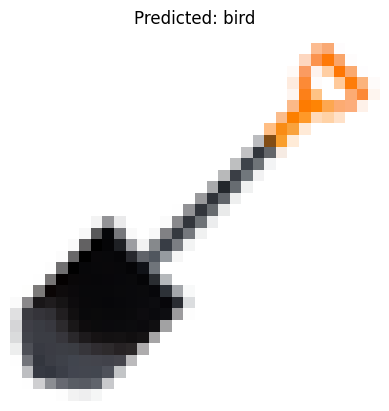

Зображення 2: Передбачений клас: airplane


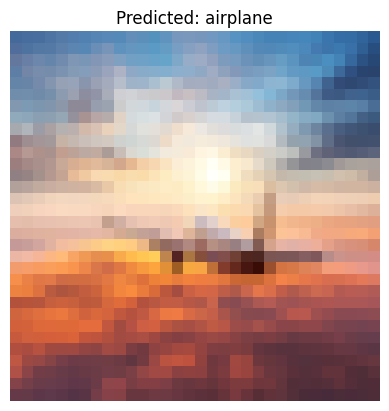

Зображення 3: Передбачений клас: ship


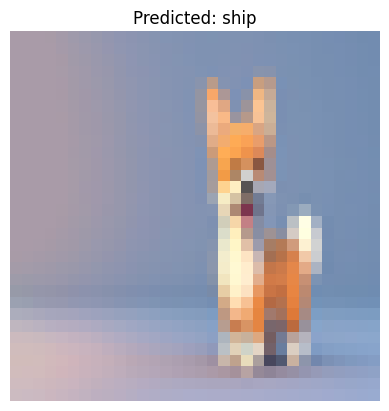

Зображення 4: Передбачений клас: deer


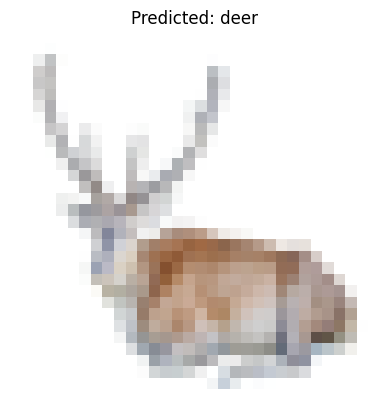

Зображення 5: Передбачений клас: deer


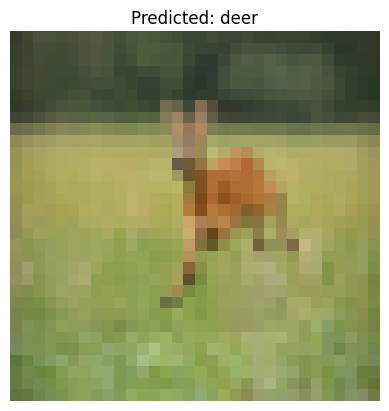

Зображення 6: Передбачений клас: deer


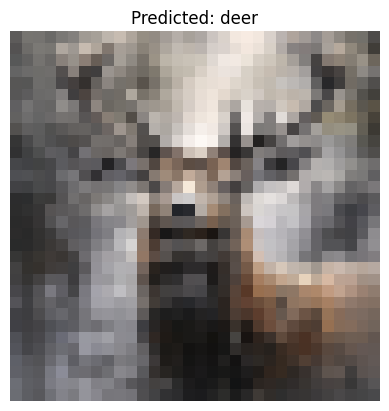

Зображення 7: Передбачений клас: deer


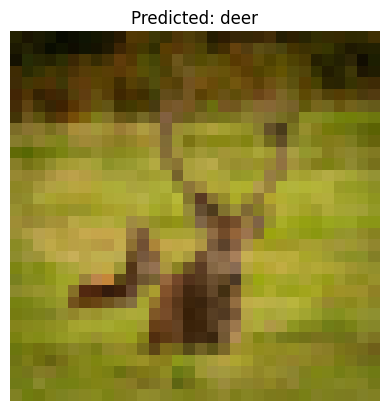

Зображення 8: Передбачений клас: frog


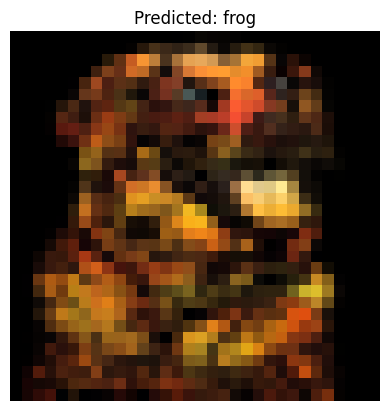

Зображення 9: Передбачений клас: dog


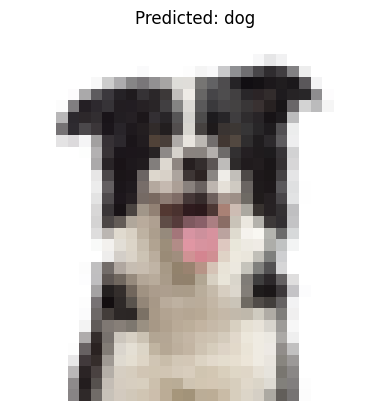

Зображення 10: Передбачений клас: dog


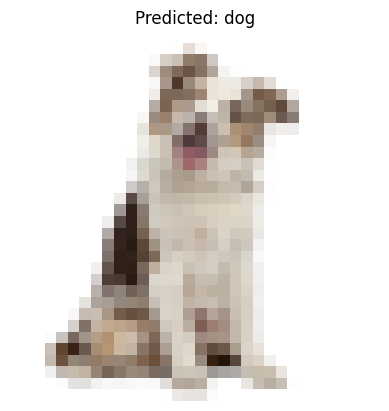

Зображення 11: Передбачений клас: cat


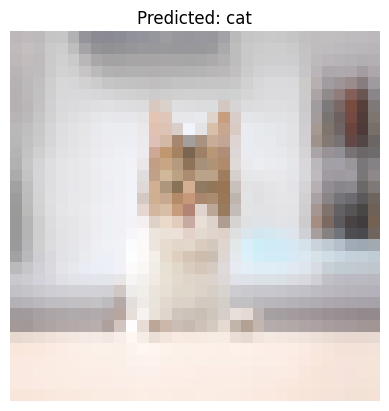

Зображення 12: Передбачений клас: cat


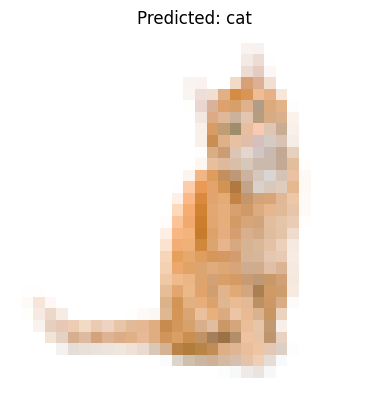

Зображення 13: Передбачений клас: cat


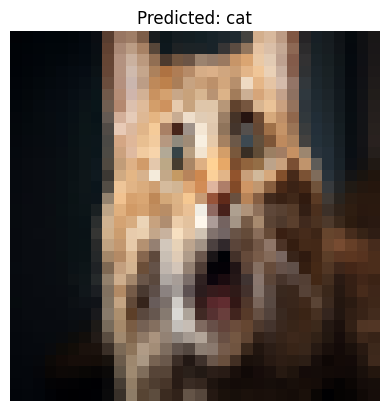

Зображення 14: Передбачений клас: airplane


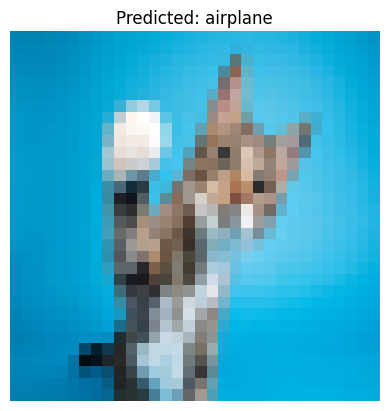

Зображення 15: Передбачений клас: airplane


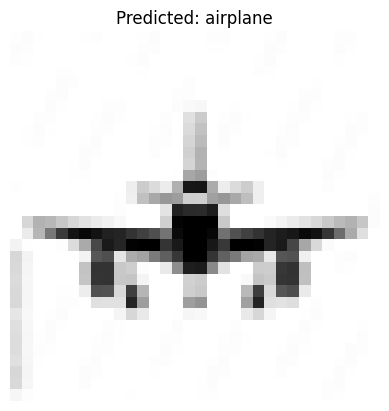

Зображення 16: Передбачений клас: automobile


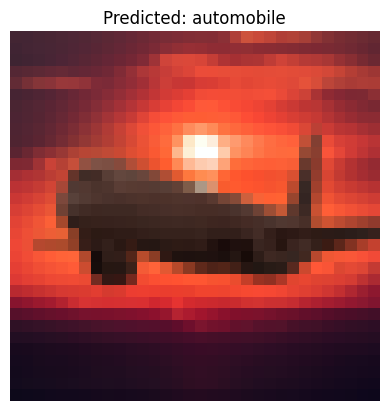

Зображення 17: Передбачений клас: airplane


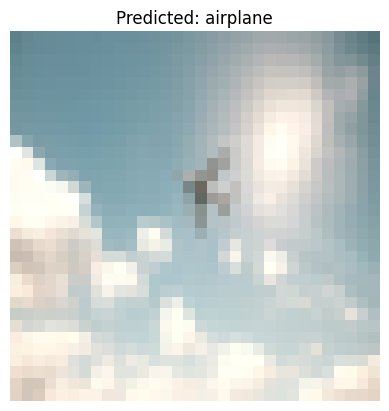

Зображення 18: Передбачений клас: automobile


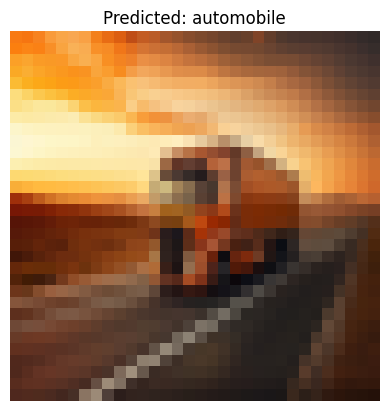

Зображення 19: Передбачений клас: truck


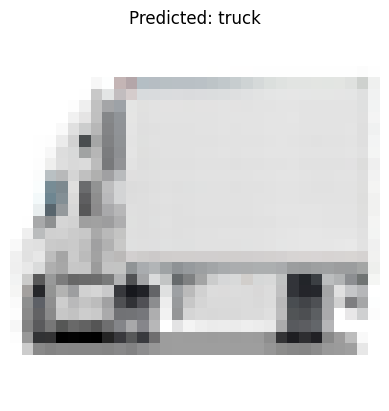

Зображення 20: Передбачений клас: truck


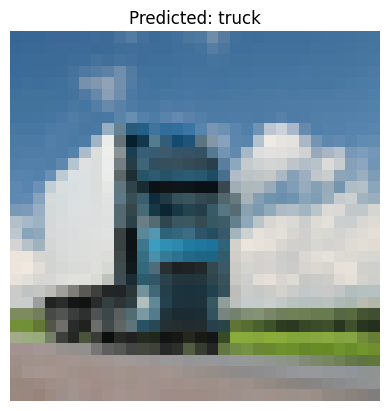

Зображення 21: Передбачений клас: airplane


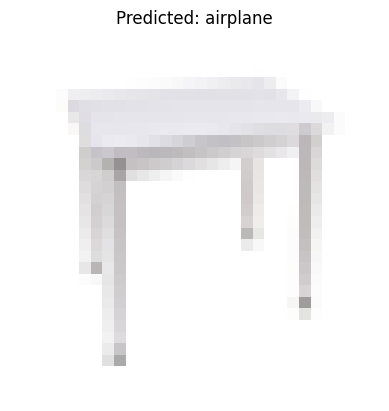

Зображення 22: Передбачений клас: airplane


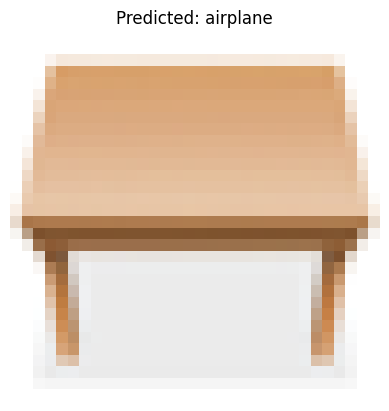

Зображення 23: Передбачений клас: bird


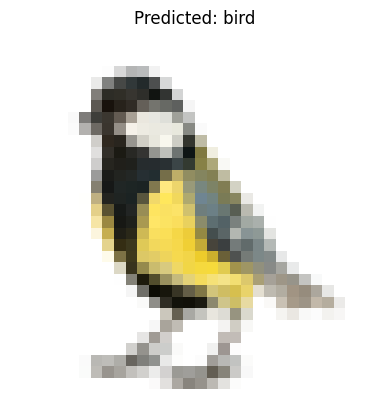

Зображення 24: Передбачений клас: bird


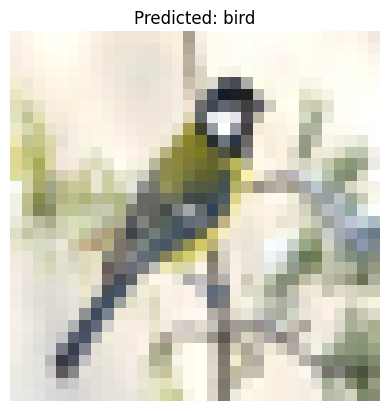

Зображення 25: Передбачений клас: deer


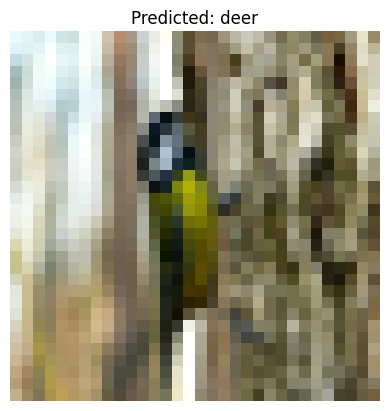

Зображення 26: Передбачений клас: bird


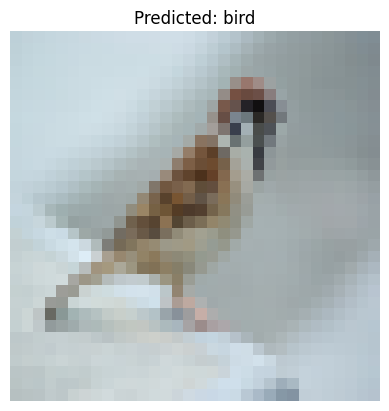

Зображення 27: Передбачений клас: bird


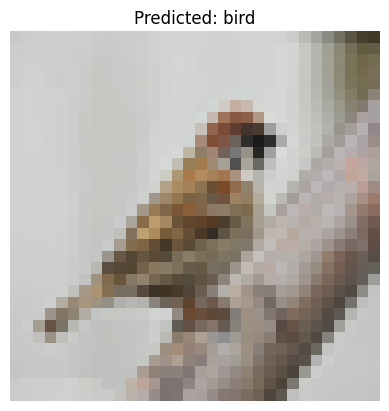

In [6]:
from PIL import Image
import numpy as np
import os
from google.colab import drive
import matplotlib.pyplot as plt

# Підключення Google Drive
drive.mount('/content/drive', force_remount=True)

# Встановлення шляху до директорії у Google Drive
# Замініть 'Мій диск' на 'My Drive', якщо це необхідно
images_dir = '/content/drive/My Drive/images_1'

# Отримання абсолютного шляху
abs_path = os.path.abspath(images_dir)

# Перевірка, чи існує директорія
if not os.path.exists(abs_path):
    print(f"Директорія {abs_path} не існує.")
    image_files = []  # Ініціалізація порожнього списку
else:
    # Отримання списку файлів у директорії
    image_files = [f for f in os.listdir(abs_path) if os.path.isfile(os.path.join(abs_path, f))]
    print(image_files)

# Створення порожнього списку для зберігання масивів зображень
image_arrays = []

# Цикл для обробки кожного зображення
for image_file in image_files:
    # Повний шлях до зображення
    image_path = os.path.join(abs_path, image_file)

    try:
        # Завантаження зображення
        image = Image.open(image_path)

        # Зміна розмірів зображення до 32x32 пікселів
        resized_image = image.resize((32, 32))

        # Конвертація зміненого зображення у numpy масив
        image_array = np.array(resized_image)

        # Додавання масиву до списку
        image_arrays.append(image_array)
    except Exception as e:
        print(f"Помилка при обробці зображення {image_file}: {e}")

# Перетворення списку масивів у багатовимірний масив numpy, якщо список не порожній
if image_arrays:
    all_images_array = np.stack(image_arrays)
    # Перевірка формату масиву
    print(all_images_array.shape)
else:
    print("Не вдалося завантажити жодного зображення.")
    all_images_array = None

# Назви класів
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Перевірка, чи є зображення для класифікації
if all_images_array is not None:
    # Нормалізація зображень
    all_images_array = all_images_array / 255.0

    # Передбачення класів для всіх зображень
    predictions = model.predict(all_images_array)

    # Відображення результатів
    for i, prediction in enumerate(predictions):
        predicted_class = np.argmax(prediction)
        predicted_class_name = class_names[predicted_class]
        print(f'Зображення {i+1}: Передбачений клас: {predicted_class_name}')

        # Відображення зображення
        plt.imshow(all_images_array[i])
        plt.title(f'Predicted: {predicted_class_name}')
        plt.axis('off')
        plt.show()
else:
    print("Неможливо виконати передбачення, оскільки немає зображень для класифікації.")

Модель 87 з правленим колбеком через передачу аргументів

МОДЕЛЬ 2 ResNet50
Перевірка коду показує, що ви використовуєте модель VGG16 з перенесенням навчання (transfer learning) для класифікації зображень CIFAR-10. Однак, VGG16 була розроблена для роботи з зображеннями розміром 224x224 пікселів, тоді як CIFAR-10 містить зображення розміром 32x32 пікселів. Це може призвести до того, що модель не зможе ефективно навчатися на таких малих зображеннях.

Крім того, використання VGG16 для задачі класифікації на CIFAR-10 може бути надмірним, оскільки VGG16 має велику кількість параметрів і може легко перенавчитися на такому невеликому наборі даних.

Ось деякі рекомендації для покращення результатів:

Використання меншої моделі: Спробуйте використовувати меншу модель, таку як ResNet або MobileNet, які більш підходять для задач з меншими зображеннями.

Зміна розміру зображень: Збільште розмір зображень CIFAR-10 до 224x224 пікселів перед подачею їх у VGG16.

Налаштування гіперпараметрів: Переконайтеся, що ви правильно налаштували гіперпараметри, такі як швидкість навчання та кількість епох.

Використання більш адекватних технік регуляризації: Додайте більше технік регуляризації, таких як Dropout або Batch Normalization.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Завантаження датасету CIFAR-10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Назви класів
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Функція для відображення прикладів зображень для кожного класу
def plot_examples(images, labels, class_names):
    num_classes = len(class_names)
    plt.figure(figsize=(15, 15))
    for i in range(num_classes):
        # Знаходження першого зображення для кожного класу
        img_index = np.where(labels == i)[0][0]
        image = images[img_index]

        plt.subplot(1, num_classes, i + 1)
        plt.imshow(image)
        plt.title(class_names[i])
        plt.axis('off')
    plt.show()

# Відображення прикладів зображень для кожного класу
plot_examples(train_images, train_labels, class_names)

In [ ]:
from PIL import Image
import numpy as np
import os
from google.colab import drive
import matplotlib.pyplot as plt

# Підключення Google Drive
drive.mount('/content/drive', force_remount=True)

# Встановлення шляху до директорії у Google Drive
# Замініть 'Мій диск' на 'My Drive', якщо це необхідно
images_dir = '/content/drive/My Drive/images_1'

# Отримання абсолютного шляху
abs_path = os.path.abspath(images_dir)

# Перевірка, чи існує директорія
if not os.path.exists(abs_path):
    print(f"Директорія {abs_path} не існує.")
    image_files = []  # Ініціалізація порожнього списку
else:
    # Отримання списку файлів у директорії
    image_files = [f for f in os.listdir(abs_path) if os.path.isfile(os.path.join(abs_path, f))]
    print(image_files)

# Створення порожнього списку для зберігання масивів зображень
image_arrays = []

# Цикл для обробки кожного зображення
for image_file in image_files:
    # Повний шлях до зображення
    image_path = os.path.join(abs_path, image_file)

    try:
        # Завантаження зображення
        image = Image.open(image_path)

        # Зміна розмірів зображення до 32x32 пікселів
        resized_image = image.resize((32, 32))

        # Конвертація зміненого зображення у numpy масив
        image_array = np.array(resized_image)

        # Додавання масиву до списку
        image_arrays.append(image_array)
    except Exception as e:
        print(f"Помилка при обробці зображення {image_file}: {e}")

# Перетворення списку масивів у багатовимірний масив numpy, якщо список не порожній
if image_arrays:
    all_images_array = np.stack(image_arrays)
    # Перевірка формату масиву
    print(all_images_array.shape)
else:
    print("Не вдалося завантажити жодного зображення.")
    all_images_array = None

# Назви класів
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Перевірка, чи є зображення для класифікації
if all_images_array is not None:
    # Нормалізація зображень
    all_images_array = all_images_array / 255.0

    # Передбачення класів для всіх зображень
    predictions = best_model.predict(all_images_array)

    # Відображення результатів
    for i, prediction in enumerate(predictions):
        predicted_class = np.argmax(prediction)
        predicted_class_name = class_names[predicted_class]
        print(f'Зображення {i+1}: Передбачений клас: {predicted_class_name}')

        # Відображення зображення
        plt.imshow(all_images_array[i])
        plt.title(f'Predicted: {predicted_class_name}')
        plt.axis('off')
        plt.show()
else:
    print("Неможливо виконати передбачення, оскільки немає зображень для класифікації.")

In [ ]:
!pip install keras-tuner
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, EarlyStopping
import os
import matplotlib.pyplot as plt

# Визначення функції побудови моделі
def build_model(hp):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

    x = base_model.output
    x = GlobalAveragePooling2D()(x)

    # Налаштування кількості нейронів у повнозв'язному шарі
    x = Dense(units=hp.Int('units', min_value=512, max_value=2048, step=512), activation='relu')(x)

    # Додавання dropout для регуляризації
    x = layers.Dropout(hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1))(x)

    predictions = Dense(10, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    # Налаштування швидкості навчання
    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Колбек для зупинки пошуку при досягненні точності 87%
class StopOnAccuracy(Callback):
    def __init__(self, threshold):
        super(StopOnAccuracy, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        val_accuracy = logs.get('val_accuracy')
        if val_accuracy >= self.threshold:
            print(f"\nДосягнуто точності {self.threshold}. Зупинка пошуку.")
            self.model.stop_training = True
            self.tuner.stop_search = True

# Завантаження датасету CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Нормалізація зображень
train_images, test_images = train_images / 255.0, test_images / 255.0

# Розширення навчальної множини
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    zoom_range=0.2,
    shear_range=0.2
)
datagen.fit(train_images)

# Перевірка наявності збереженої моделі
if os.path.exists('best_model.keras'):
    print("Завантаження збереженої моделі...")
    best_model = tf.keras.models.load_model('best_model.keras')
else:
    # Ініціалізація Keras Tuner з використанням RandomSearch
    tuner = kt.RandomSearch(build_model,
                            objective='val_accuracy',
                            max_trials=50,
                            directory='my_dir',
                            project_name='cifar10_vgg16')

    # Колбеки для збереження найкращої моделі та ранньої зупинки
    checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, mode='max', restore_best_weights=True)
    stop_on_accuracy = StopOnAccuracy(threshold=0.87)

    # Пошук оптимальних гіперпараметрів
    history = tuner.search(datagen.flow(train_images, train_labels, batch_size=64),
                 epochs=100,
                 validation_data=(test_images, test_labels),
                 callbacks=[checkpoint, early_stopping, stop_on_accuracy])

    # Отримання найкращої моделі
    best_model = tuner.get_best_models(num_models=1)[0]

    # Оцінка найкращої моделі
    test_loss, test_acc = best_model.evaluate(test_images, test_labels, verbose=2)
    print(f'Точність на тестовому наборі: {test_acc}')

    # Візуалізація точності та втрат
    history = tuner.get_best_models(num_models=1)[0].history
    plt.figure(figsize=(12, 4))

    # Графік точності
    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'], label='Точність на тренуванні')
    plt.plot(history['val_accuracy'], label='Точність на валідації')
    plt.xlabel('Епоха')
    plt.ylabel('Точність')
    plt.legend()
    plt.title('Точність тренування та валідації')

    # Графік втрат
    plt.subplot(1, 2, 2)
    plt.plot(history['loss'], label='Втрати на тренуванні')
    plt.plot(history['val_loss'], label='Втрати на валідації')
    plt.xlabel('Епоха')
    plt.ylabel('Втрати')
    plt.legend()
    plt.title('Втрати тренування та валідації')

    plt.show()

# Класифікація нових зображень
# Приклад: new_images, new_labels = load_new_images()
# new_images = new_images / 255.0
# predictions = best_model.predict(new_images)
# print(predictions)

In [ ]:
!pip install keras-tuner

from PIL import Image
import numpy as np
import os
from google.colab import drive
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import json

# Визначення функції побудови моделі
def build_model(hp):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

    x = base_model.output
    x = GlobalAveragePooling2D()(x)

    # Налаштування кількості нейронів у повнозв'язному шарі
    x = Dense(units=hp.Int('units', min_value=512, max_value=2048, step=512), activation='relu')(x)

    # Додавання dropout для регуляризації
    x = layers.Dropout(hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1))(x)

    predictions = Dense(10, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    # Налаштування швидкості навчання
    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Колбек для зупинки пошуку при досягненні точності 87%
class StopOnAccuracy(Callback):
    def __init__(self, threshold, tuner):
        super(StopOnAccuracy, self).__init__()
        self.threshold = threshold
        self.tuner = tuner

    def on_epoch_end(self, epoch, logs=None):
        val_accuracy = logs.get('val_accuracy')
        if val_accuracy is not None:
            print(f"\nЕпоха {epoch + 1}: val_accuracy = {val_accuracy}")
            if val_accuracy >= self.threshold:
                print(f"\nДосягнуто точності {self.threshold}. Зупинка пошуку.")
                self.model.stop_training = True
                self.tuner.stop_search = True
                self.tuner.oracle.ongoing_trials.clear()  # Очищення активних проб
                best_model = self.tuner.get_best_models(num_models=1)[0]
                best_model.save('best_model.keras')  # Збереження найкращої моделі
        else:
            print("\nval_accuracy не знайдено в логах.")

# Завантаження датасету CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Нормалізація зображень
train_images, test_images = train_images / 255.0, test_images / 255.0

# Розширення навчальної множини
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    zoom_range=0.2,
    shear_range=0.2
)
datagen.fit(train_images)

# Перевірка наявності збереженої моделі та інформації про пошук гіперпараметрів
if os.path.exists('search_completed.json'):
    with open('search_completed.json', 'r') as f:
        search_completed = json.load(f)
else:
    search_completed = False

if os.path.exists('best_model.keras') and search_completed:
    print("Завантаження збереженої моделі...")
    best_model = tf.keras.models.load_model('best_model.keras')
else:
    # Ініціалізація Keras Tuner з використанням RandomSearch
    tuner = kt.RandomSearch(build_model,
                            objective='val_accuracy',
                            max_trials=50,
                            directory='my_dir',
                            project_name='cifar10_vgg16')

    # Колбеки для збереження найкращої моделі та ранньої зупинки
    checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, mode='max', restore_best_weights=True)
    stop_on_accuracy = StopOnAccuracy(threshold=0.87, tuner=tuner)

    # Пошук оптимальних гіперпараметрів
    tuner.search(datagen.flow(train_images, train_labels, batch_size=64),
                 epochs=100,
                 validation_data=(test_images, test_labels),
                 callbacks=[checkpoint, early_stopping, stop_on_accuracy])

    # Отримання найкращої моделі
    best_model = tuner.get_best_models(num_models=1)[0]

    # Оцінка найкращої моделі
    test_loss, test_acc = best_model.evaluate(test_images, test_labels, verbose=2)
    print(f'Точність на тестовому наборі: {test_acc}')

    # Збереження інформації про те, що пошук був виконаний
    with open('search_completed.json', 'w') as f:
        json.dump(True, f)

# Підключення Google Drive
drive.mount('/content/drive', force_remount=True)

# Встановлення шляху до директорії у Google Drive
images_dir = '/content/drive/My Drive/images_1'

# Отримання абсолютного шляху
abs_path = os.path.abspath(images_dir)

# Перевірка, чи існує директорія
if not os.path.exists(abs_path):
    print(f"Директорія {abs_path} не існує.")
    image_files = []  # Ініціалізація порожнього списку
else:
    # Отримання списку файлів у директорії
    image_files = [f for f in os.listdir(abs_path) if os.path.isfile(os.path.join(abs_path, f))]
    print(image_files)

# Створення порожнього списку для зберігання масивів зображень
image_arrays = []

# Цикл для обробки кожного зображення
for image_file in image_files:
    # Повний шлях до зображення
    image_path = os.path.join(abs_path, image_file)

    try:
        # Завантаження зображення
        image = Image.open(image_path)

        # Зміна розмірів зображення до 32x32 пікселів
        resized_image = image.resize((32, 32))

        # Конвертація зміненого зображення у numpy масив
        image_array = np.array(resized_image)

        # Додавання масиву до списку
        image_arrays.append(image_array)
    except Exception as e:
        print(f"Помилка при обробці зображення {image_file}: {e}")

# Перетворення списку масивів у багатовимірний масив numpy, якщо список не порожній
if image_arrays:
    all_images_array = np.stack(image_arrays)
    # Перевірка формату масиву
    print(all_images_array.shape)
else:
    print("Не вдалося завантажити жодного зображення.")
    all_images_array = None

# Назви класів
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Перевірка, чи є зображення для класифікації
if all_images_array is not None:
    # Нормалізація зображень
    all_images_array = all_images_array / 255.0

    # Передбачення класів для всіх зображень
    predictions = best_model.predict(all_images_array)

    # Відображення результатів
    for i, prediction in enumerate(predictions):
        predicted_class = np.argmax(prediction)
        predicted_class_name = class_names[predicted_class]
        print(f'Зображення {i+1}: Передбачений клас: {predicted_class_name}')

        # Відображення зображення
        plt.imshow(all_images_array[i])
        plt.title(f'Predicted: {predicted_class_name}')
        plt.axis('off')
        plt.show()
else:
    print("Неможливо виконати передбачення, оскільки немає зображень для класифікації.")

In [ ]:
!pip install keras-tuner

from PIL import Image
import numpy as np
import os
from google.colab import drive
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import json

# Визначення функції побудови моделі
def build_model(hp):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

    x = base_model.output
    x = GlobalAveragePooling2D()(x)

    # Налаштування кількості нейронів у повнозв'язному шарі
    x = Dense(units=hp.Int('units', min_value=512, max_value=2048, step=512), activation='relu')(x)

    # Додавання dropout для регуляризації
    x = layers.Dropout(hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1))(x)

    predictions = Dense(10, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    # Налаштування швидкості навчання
    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Колбек для зупинки пошуку при досягненні точності 87%
class StopOnAccuracy(Callback):
    def __init__(self, threshold, tuner):
        super(StopOnAccuracy, self).__init__()
        self.threshold = threshold
        self.tuner = tuner

    def on_epoch_end(self, epoch, logs=None):
        val_accuracy = logs.get('val_accuracy')
        if val_accuracy is not None:
            print(f"\nЕпоха {epoch + 1}: val_accuracy = {val_accuracy}")
            if val_accuracy >= self.threshold:
                print(f"\nДосягнуто точності {self.threshold}. Зупинка пошуку.")
                self.model.stop_training = True
                self.tuner.stop_search = True
                self.tuner.oracle.ongoing_trials.clear()  # Очищення активних проб
                best_model = self.tuner.get_best_models(num_models=1)[0]
                best_model.save('best_model.keras')  # Збереження найкращої моделі
        else:
            print("\nval_accuracy не знайдено в логах.")

# Завантаження датасету CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Нормалізація зображень
train_images, test_images = train_images / 255.0, test_images / 255.0

# Розширення навчальної множини
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    zoom_range=0.2,
    shear_range=0.2
)
datagen.fit(train_images)

# Перевірка наявності збереженої моделі та інформації про пошук гіперпараметрів
if os.path.exists('search_completed.json'):
    with open('search_completed.json', 'r') as f:
        search_completed = json.load(f)
else:
    search_completed = False

if os.path.exists('best_model.keras') and search_completed:
    print("Завантаження збереженої моделі...")
    best_model = tf.keras.models.load_model('best_model.keras')
else:
    # Ініціалізація Keras Tuner з використанням RandomSearch
    tuner = kt.RandomSearch(build_model,
                            objective='val_accuracy',
                            max_trials=50,
                            directory='my_dir',
                            project_name='cifar10_vgg16')

    # Колбеки для збереження найкращої моделі та ранньої зупинки
    checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, mode='max', restore_best_weights=True)
    stop_on_accuracy = StopOnAccuracy(threshold=0.87, tuner=tuner)

    # Пошук оптимальних гіперпараметрів
    tuner.search(datagen.flow(train_images, train_labels, batch_size=64),
                 epochs=100,
                 validation_data=(test_images, test_labels),
                 callbacks=[checkpoint, early_stopping, stop_on_accuracy])

    # Отримання найкращої моделі
    best_model = tuner.get_best_models(num_models=1)[0]

    # Оцінка найкращої моделі
    test_loss, test_acc = best_model.evaluate(test_images, test_labels, verbose=2)
    print(f'Точність на тестовому наборі: {test_acc}')

    # Збереження інформації про те, що пошук був виконаний
    with open('search_completed.json', 'w') as f:
        json.dump(True, f)

# Підключення Google Drive
drive.mount('/content/drive', force_remount=True)

# Встановлення шляху до директорії у Google Drive
images_dir = '/content/drive/My Drive/images_1'

# Отримання абсолютного шляху
abs_path = os.path.abspath(images_dir)

# Перевірка, чи існує директорія
if not os.path.exists(abs_path):
    print(f"Директорія {abs_path} не існує.")
    image_files = []  # Ініціалізація порожнього списку
else:
    # Отримання списку файлів у директорії
    image_files = [f for f in os.listdir(abs_path) if os.path.isfile(os.path.join(abs_path, f))]
    print(image_files)

# Створення порожнього списку для зберігання масивів зображень
image_arrays = []

# Цикл для обробки кожного зображення
for image_file in image_files:
    # Повний шлях до зображення
    image_path = os.path.join(abs_path, image_file)

    try:
        # Завантаження зображення
        image = Image.open(image_path)

        # Зміна розмірів зображення до 32x32 пікселів
        resized_image = image.resize((32, 32))

        # Конвертація зміненого зображення у numpy масив
        image_array = np.array(resized_image)

        # Додавання масиву до списку
        image_arrays.append(image_array)
    except Exception as e:
        print(f"Помилка при обробці зображення {image_file}: {e}")

# Перетворення списку масивів у багатовимірний масив numpy, якщо список не порожній
if image_arrays:
    all_images_array = np.stack(image_arrays)
    # Перевірка формату масиву
    print(all_images_array.shape)
else:
    print("Не вдалося завантажити жодного зображення.")
    all_images_array = None

# Назви класів
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Перевірка, чи є зображення для класифікації
if all_images_array is not None:
    # Нормалізація зображень
    all_images_array = all_images_array / 255.0

    # Передбачення класів для всіх зображень
    predictions = best_model.predict(all_images_array)

    # Відображення результатів
    for i, prediction in enumerate(predictions):
        predicted_class = np.argmax(prediction)
        predicted_class_name = class_names[predicted_class]
        print(f'Зображення {i+1}: Передбачений клас: {predicted_class_name}')

        # Відображення зображення
        plt.imshow(all_images_array[i])
        plt.title(f'Predicted: {predicted_class_name}')
        plt.axis('off')
        plt.show()
else:
    print("Неможливо виконати передбачення, оскільки немає зображень для класифікації.")